In [2]:
import time
t0 = time.clock()

In [20]:
import os
from IPython.core.display import display, HTML

if (os.name == 'nt'):
    datafolder = './'
    color = 'red'
else:
    datafolder = './Users/jimgries/'
    color = 'green'

display(HTML(F'<H1>Hello from <span style="color:{color};">' + str.upper(os.name) + '</span>!!!!</H1>'))

****************************************************************
 # Setup
 1. Read in the covid-19-data from nytimes for state and county (https://github.com/nytimes/covid-19-data)
 2. Pull in a city density table
 3. Pull in a state density table
 4. Identify list of states, counties and cities to graph
****************************************************************

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [4]:
state_cov_data = pd.read_csv(datafolder + 'us-states.csv')
county_cov_data = pd.read_csv(datafolder + 'us-counties.csv')

population_city_density = pd.read_csv(datafolder + 'city_density.csv')
population_city_density = population_city_density.rename(columns={'City': 'citystate', 'Population Density (Persons/Square Mile)': 'density', '2016 Population': 'population', 'Land Area (Square Miles)': 'area'} )
population_city_density[['city', 'state']] = population_city_density.citystate.str.split(', ', expand=True)

population_state_density = pd.read_csv(datafolder + 'state_density.csv')
population_state_density = population_state_density.rename(columns={'State': 'state', 'Density': 'density', 'Pop': 'population', 'LandArea': 'area'})

county_cities = [
    ['New York', 'New York City', ['New York']],
    ['New Jersey', 'Bergen', ['Newark', 'Jersey City']],
    ['Washington', 'King', ['Seattle']],
    #['Washington', 'Snohomish', ['Everett']],
    ['California', 'Los Angeles', ['Los Angeles']],
    #['Illinois', 'Cook', ['Chicago']],
    ['Louisiana', 'Orleans', ['New Orleans']],
    ['Ohio', 'Cuyahoga', ['Cleveland']],
    ['Michigan', 'Wayne', ['Detroit']],
    #['Florida', 'Miami-Dade', ['Miami']],
    #['Florida', 'Broward', ['Fort Lauderdale']],
    #['Massachusetts', 'Suffolk', ['Boston']],
    #['California', 'San Francisco', ['San Francisco']],
    #['South Carolina', 'Charleston', ['Charleston']],
    #['Indiana', 'Hamilton', ['Carmel']]
]

county_cities_map = pd.DataFrame(county_cities, columns = ['state', 'county', 'cities'])
states = county_cities_map.state

****************************************************************
 # State Totals
 The total number of cases for each interesting state starting with a minimum number of cases
****************************************************************

In [5]:
def plottotalcases(state, county = 'all'):
    if county == 'all':
        data = state_cov_data[state_cov_data.state == state][['date', 'cases']]
    else:
        data = county_cov_data[county_cov_data.state == state][['date', 'cases', 'county']]
        data = data[county_cov_data.county == county][['date', 'cases']]

    data = data[data.cases >= starting_cases]
    if len(data['cases']):
        data_asarray = data.cases.values
        ax.set_xlim(0, max(data_asarray.size, ax.get_xlim()[1]))
        ax.set_ylim(0, max(data['cases'].max(), ax.get_ylim()[1]))
        if (county == 'all'):
            ax.plot(data_asarray, label=state)
        else:
            ax.plot(data_asarray, label=county + ',  ' + state)

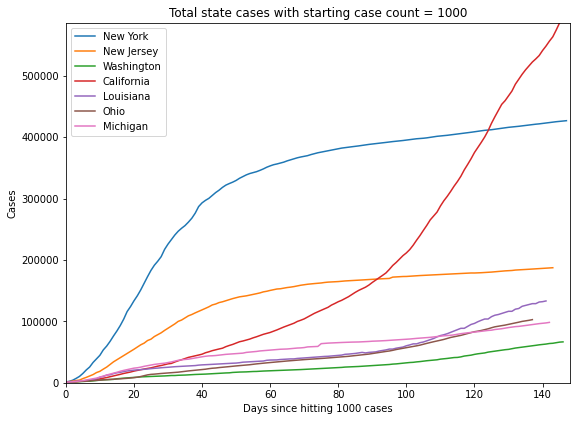

In [6]:
starting_cases = 1000
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Total state cases with starting case count = ' + str(starting_cases))
ax.set_xlabel('Days since hitting ' + str(starting_cases) + ' cases')
ax.set_ylabel('Cases')

for s in states.unique():
    plottotalcases(s)

ax.legend()

****************************************************************
 # County Total cases by state county
 The total number of cases for each interesting county starting with a minimum number of cases
****************************************************************


/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/envs/azureml_py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/anaconda/envs/azureml_py36/lib/python3.

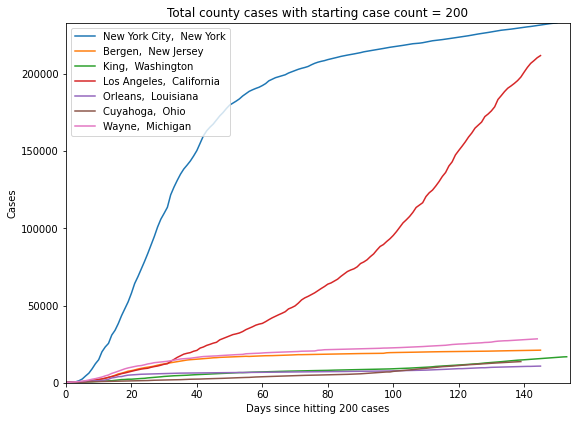

In [7]:
starting_cases = 200
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Total county cases with starting case count = ' + str(starting_cases))
ax.set_xlabel('Days since hitting ' + str(starting_cases) + ' cases')
ax.set_ylabel('Cases')

for p in county_cities_map.itertuples():
    plottotalcases(p.state, p.county)

ax.legend()

****************************************************************
 # State per capita
 To better get a sense of how different states may be handling the virus outbreak, you can
 adjust the graphs to account for the number of people who live in each state. A state that has
 100,000 people vs 8,000,000 people will obviously look far better with regard to total cases
 because they have 80x less people. By factoring in the population of a state, this is difference
 is accounted for.

 This graph indicates that New York, New Jersey, and Louisiana, are getting far more cases per day
 than the other states, regardless of how many people live in each state.
****************************************************************

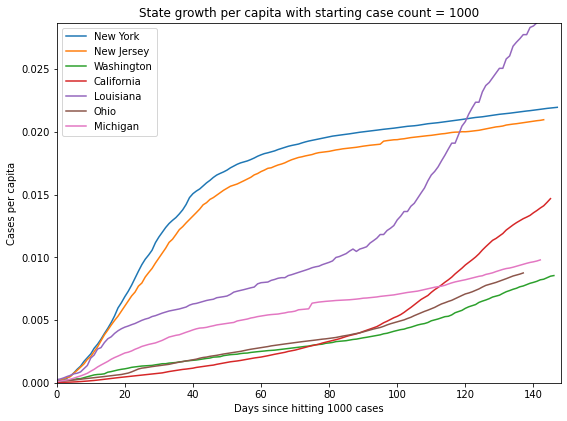

In [8]:
starting_cases = 1000
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('State growth per capita with starting case count = ' + str(starting_cases))
ax.set_xlabel('Days since hitting ' + str(starting_cases) + ' cases')
ax.set_ylabel('Cases per capita')
ax.set_ylim(0, 0.0001)

def stateplotpercapita(state):
    data = state_cov_data[state_cov_data.state == state][['date', 'cases']]
    data = data[data.cases >= starting_cases]
    state_population = population_state_density[population_state_density.state == state]
    if len(state_population):
       data.cases = data.cases / state_population.population.values[0]
       if len(data['cases']):
            data_asarray = data.cases.values
            ax.set_xlim(0, max(data_asarray.size, ax.get_xlim()[1]))
            ax.set_ylim(0, max(data['cases'].max(), ax.get_ylim()[1]))
            ax.plot(data_asarray, label=state)

for s in states.unique():
    stateplotpercapita(s)

ax.legend()

****************************************************************
 # State normalized by population density

 Each state has a population and an area in which this population lives. *Pretend* for a moment that Texas only has 100,000
 people total. Also *pretend* that Rhode Island has 100,000 people. However, you also know that the
 land area of Rhode Island is much, much smaller than that of Texas. So, if Rhode Island gets 5,000 cases of the virus
 and Texas also gets 5,000 case, then you can say with high confidence that the people in Texas are likely completely
 ignoring advice to keep a minimum distance from others. I mean how else could they have the same number of cases as Rhode Island
 where the same number of people are packed together?
 This graph removes this consideration from the comparison between states. As you can see, New Jersey is doing far worse than
 than Ohio, Washington and California.
****************************************************************

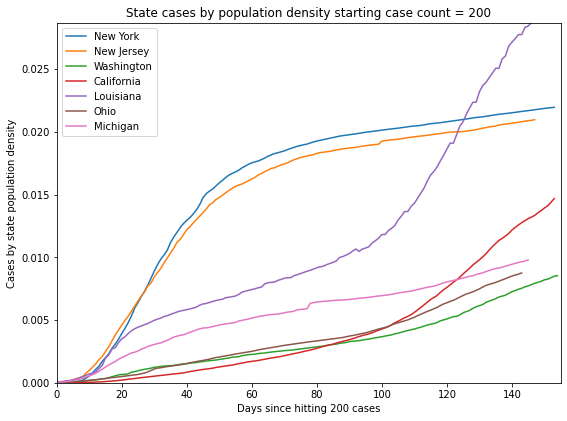

In [9]:
starting_cases = 200
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('State cases by population density starting case count = ' + str(starting_cases))
ax.set_xlabel('Days since hitting ' + str(starting_cases) + ' cases')
ax.set_ylabel('Cases by state population density')
ax.set_ylim(0, 0.0001)

def stateplotbydensity(state):
    data = state_cov_data[state_cov_data.state == state][['date', 'cases']]
    data = data[data.cases >= starting_cases]
    state_density = population_state_density[population_state_density.state == state]
    if len(state_density):
        data.cases = data.cases / state_density.density.values[0]
        if len(data['cases']):
            data_asarray = data.cases.values
            ax.set_xlim(0, max(data_asarray.size, ax.get_xlim()[1]))
            ax.set_ylim(0, max(data['cases'].max(), ax.get_ylim()[1]))
            ax.plot(data_asarray, label=state)

for s in states.unique():
    stateplotpercapita(s)

ax.legend()

****************************************************************
 # Cities normalized by population density
 Ohhhh, but I hear you say... Well the area of California is far larger than than of New York. Therefore, the population
 density of California can EASILY be lower than that of New York, so this will still skew the results. In addition, each
 state likely has a hotspot city and in those cities the population density may be FAR higher than looking at the state overall.
 In other words the population density of Los Angeles is probably FAR higher than that of California overall, so ranking
 by state-wide density isn't fair.

 Ok, then lets look at individual cities in each of the states!

 This graph shows that even though Detroit Michigan's population density is around 5x less than that of New York City,
 the number of virus cases is growing there far faster than even New York and New Orleans (which both suck!). I'd be much more worried if I lived there.
 Note that Cleveland and Seattle are pretty flat, which is really good.
****************************************************************

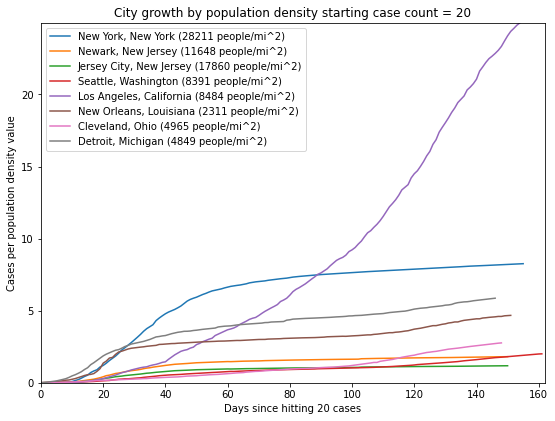

In [10]:
starting_cases = 20
fig = plt.figure(figsize=(7,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title('City growth by population density starting case count = ' + str(starting_cases))
ax.set_xlabel('Days since hitting ' + str(starting_cases) + ' cases')
ax.set_ylabel('Cases per population density value')
ax.set_ylim(0, 0.0001)

def cityplotbydensity(state, city):
    county = 'not found'
    for x in county_cities_map.itertuples():
        if city in x.cities and state == x.state:
            county = x.county

    data = county_cov_data[(county_cov_data.state == state) & (county_cov_data.county == county)][['date', 'cases']]
    data = data[data.cases >= starting_cases]
    city_density = population_city_density[(population_city_density.state == state) & (population_city_density.city == city)]
    if (len(city_density)):
        data.cases = data.cases / city_density.density.values[0]
        if len(data['cases']):
            data_asarray = data.cases.values
            ax.set_xlim(0, max(data_asarray.size, ax.get_xlim()[1]))
            ax.set_ylim(0, max(data['cases'].max(), ax.get_ylim()[1]))
            ax.plot(data_asarray, label=city + ', ' + state + ' (' + str(city_density.density.values[0]) + ' people/mi^2)')

for p in county_cities_map.itertuples():
    for c in p.cities:
        cityplotbydensity(p.state, c)

ax.legend()

In [11]:
print('Total run time: ', time.clock() - t0)

Total run time:  2.779883
